In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('dark')
from sklearn.metrics import confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MLP_project/datasets/EEG_data.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB
None


In [ ]:
df_dem = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/MLP_project/datasets/demographic_info.csv')
df_dem = df_dem.rename(columns={'subject ID':'SubjectID', ' age':'Age', ' ethnicity':'Ethnicity', ' gender':'Gender'})
df_dem.head()

,SubjectID,Age,Ethnicity,Gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [ ]:
# Merge both dataframes
df = data.merge(df_dem, how='inner', on='SubjectID')
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity,Gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
 15  Age                 12811 non-null  int64  
 16  Ethn

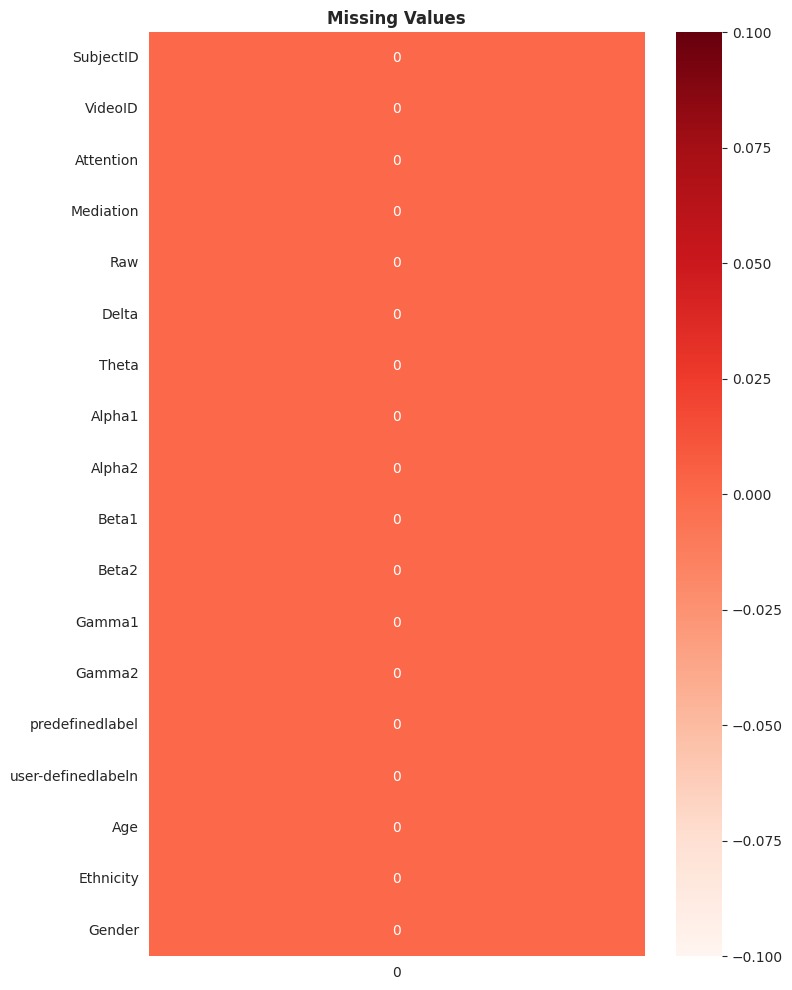

In [ ]:
# Checking for missing values
plt.figure(figsize=(8, 12))
plt.title('Missing Values', weight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d', cmap='Reds')
plt.show()

<ipython-input-6-7b98b7f1a568>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='RdBu', ax=ax)


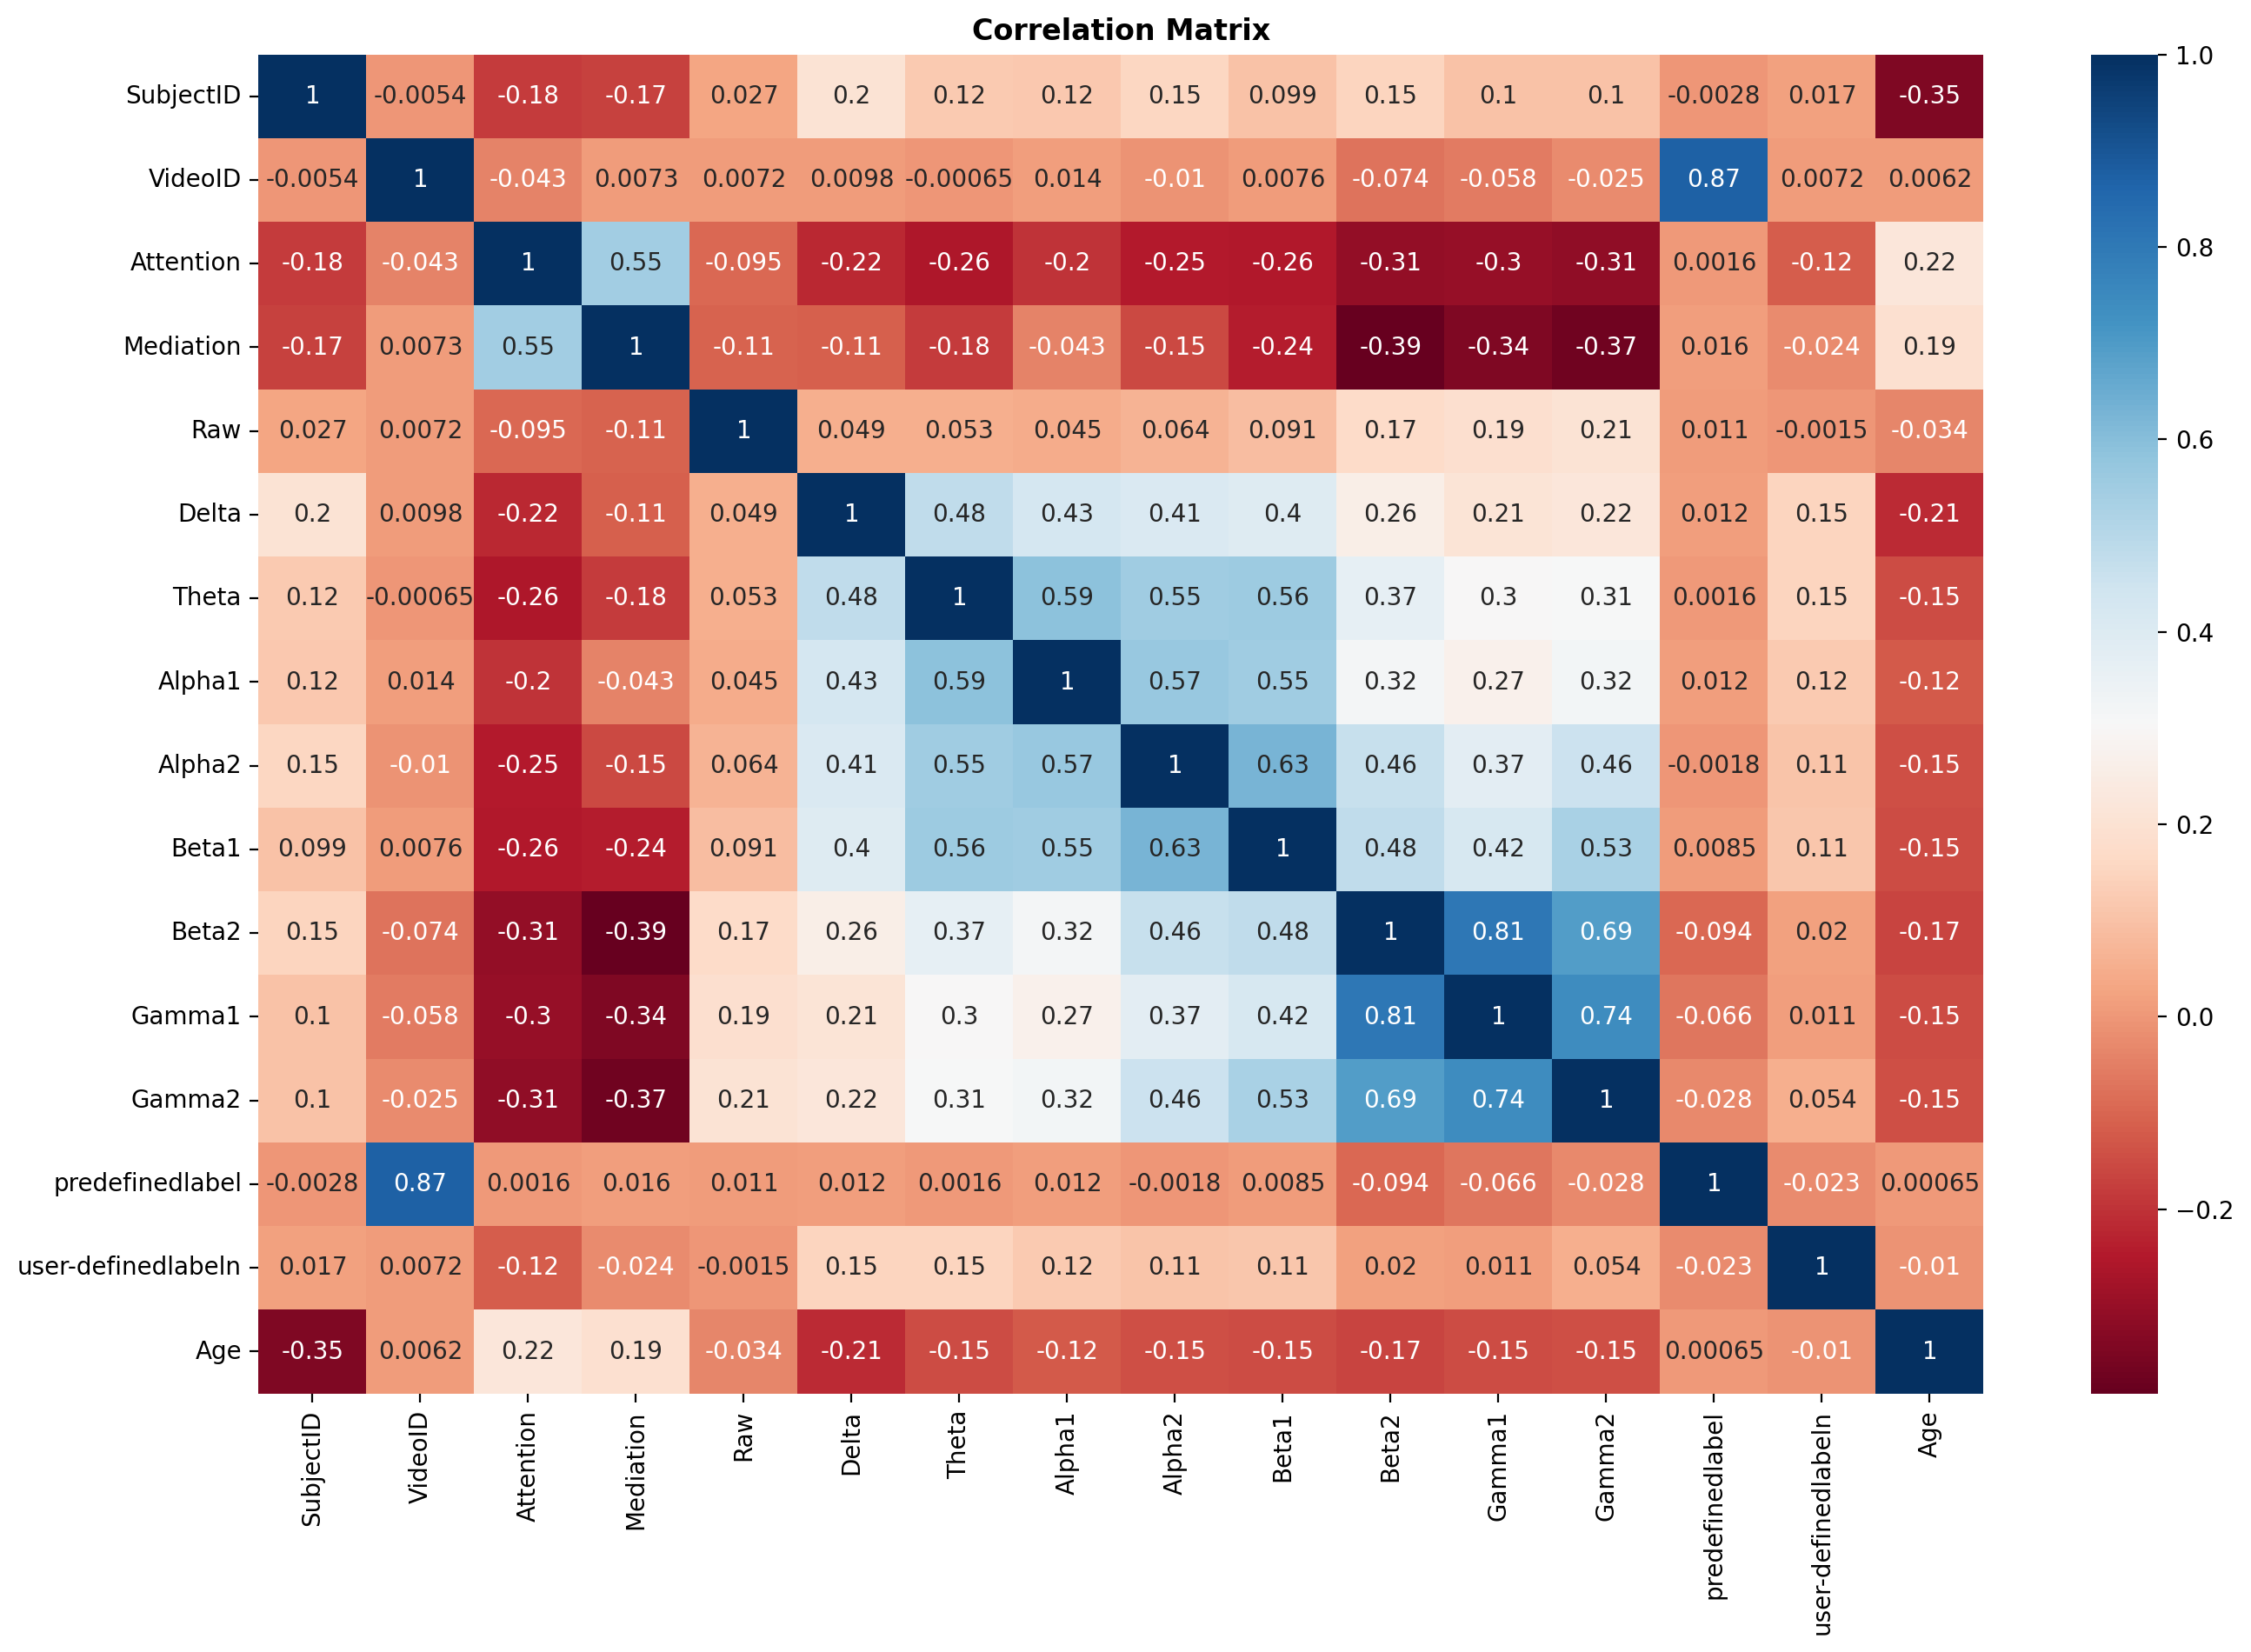

In [ ]:
plt.figure(figsize = (16,10), dpi=200)
ax = plt.axes()
sns.heatmap(df.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix', weight='bold')
plt.show()

<ipython-input-7-002d8774e368>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

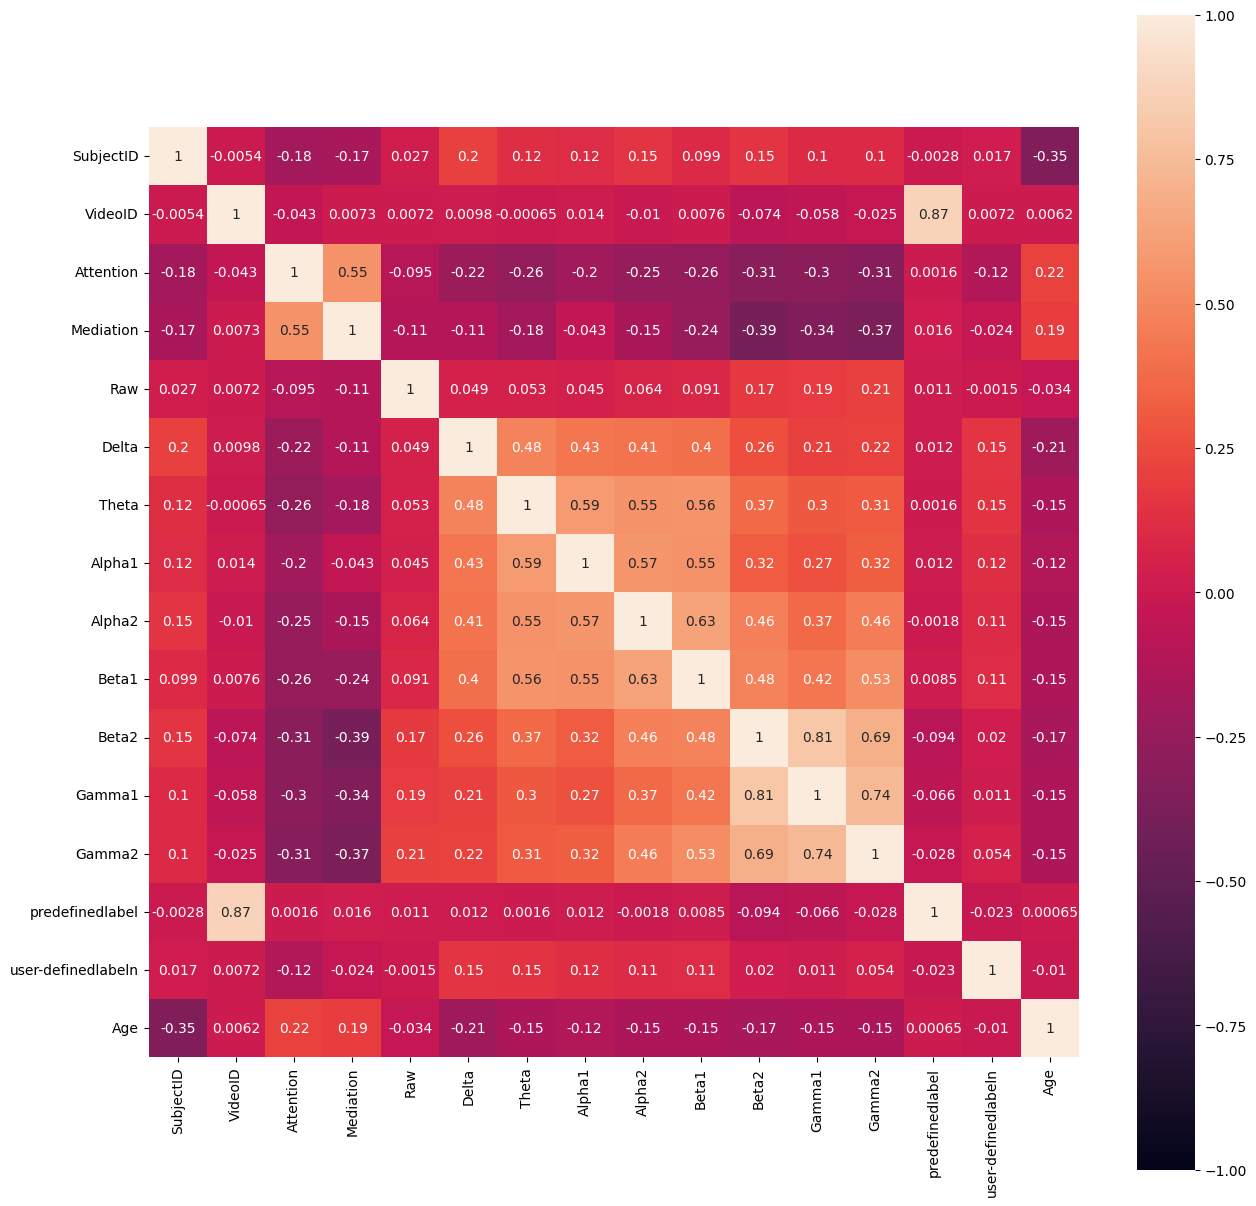

In [ ]:
plt.figure(figsize = (15,15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,vmin = -1.0, square=True, annot = True)

In [ ]:
### 個別做 ###
### data preprocessing ###
from sklearn.preprocessing import StandardScaler

# 定義要保留的欄位 (remove attention and mediation)
columns_to_keep = ['SubjectID', 'VideoID','Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'user-definedlabeln', 'predefinedlabel']

# Empty list to hold the processed groups
processed_groups = []

# 定義需要標準化的列
columns_to_normalize = [ 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']

# 迭代每個受試者ID和影片ID的組合
for (subject_id, video_id), group in data.groupby(['SubjectID', 'VideoID']):

    # 選擇前112個時間點的數據
    selected_data = group.iloc[0:112]

    # 只選擇所需特徵
    selected_data = selected_data[columns_to_keep]

    # 對相關列應用標準化
    scaler = StandardScaler()
    selected_data[columns_to_normalize] = scaler.fit_transform(selected_data[columns_to_normalize])

    # 將處理並標準化的群組加入列表
    processed_groups.append(selected_data)

# 將所有處理過的群組合併成一個DataFrame
extracted_df = pd.concat(processed_groups)

In [ ]:
### 整體做 ###
### data preprocessing ###
from sklearn.preprocessing import StandardScaler

# 定義要保留的欄位 (remove attention and mediation)
columns_to_keep = ['SubjectID', 'VideoID', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'user-definedlabeln', 'predefinedlabel']

# Empty list to hold the processed groups
processed_groups = []

# 定義需要標準化的列
columns_to_normalize = [ 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']

# 初始化標準化器
scaler = StandardScaler()

# 迭代每個受試者ID和影片ID的組合
for (subject_id, video_id), group in data.groupby(['SubjectID', 'VideoID']):

    # 選擇前112個時間點的數據
    selected_data = group.iloc[0:112]

    # 只選擇所需特徵
    selected_data = selected_data[columns_to_keep]

    # 將需要標準化的數據重塑為長向量
    normalized_data = selected_data[columns_to_normalize].values.reshape(-1, 1)

    # 對重塑後的數據進行標準化
    normalized_data = scaler.fit_transform(normalized_data)

    # 將標準化後的數據重塑回原始形狀
    normalized_data = normalized_data.reshape(-1, len(columns_to_normalize))

    # 替換原始數據
    selected_data[columns_to_normalize] = normalized_data

    # 將處理並標準化的群組加入列表
    processed_groups.append(selected_data)

# 將所有處理過的群組合併成一個DataFrame
extracted_df = pd.concat(processed_groups)

<ipython-input-6-ebcad9d66d41>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[columns_to_normalize] = normalized_data


In [ ]:
extracted_df

,SubjectID,VideoID,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln,predefinedlabel
0,0.0,0.0,1.141443,0.073598,-0.213772,-0.263003,-0.243021,-0.156366,-0.216334,-0.342317,0.0,0.0
1,0.0,0.0,-0.011410,-0.242329,-0.376947,-0.372900,-0.370343,-0.365589,-0.357474,-0.370373,0.0,0.0
2,0.0,0.0,3.447343,1.554645,0.636378,-0.070423,-0.200848,0.275313,-0.094998,-0.256117,0.0,0.0
3,0.0,0.0,9.782576,0.269320,-0.074824,-0.297901,-0.326174,-0.068630,-0.131796,-0.212777,0.0,0.0
4,0.0,0.0,4.694253,1.406016,-0.196760,0.064852,-0.155305,0.119024,-0.157917,-0.233911,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12796,9.0,9.0,2.405937,-0.053269,-0.337469,-0.301894,-0.356655,-0.313820,-0.370353,-0.389255,0.0,1.0
12797,9.0,9.0,0.624085,-0.355761,-0.364011,-0.372364,-0.391988,-0.360384,-0.390090,-0.394012,0.0,1.0
12798,9.0,9.0,-0.267427,-0.349483,-0.383513,-0.339796,-0.391251,-0.328161,-0.391352,-0.394578,0.0,1.0
12799,9.0,9.0,4.935645,-0.017412,-0.118564,-0.111415,-0.132859,-0.244461,0.068468,-0.381346,0.0,1.0


In [ ]:
print(extracted_df.shape)
print(len(processed_groups))

(11200, 12)
100


user-definedlabeln使用subject: 0測試，正確率：0.6696428571428571
user-definedlabeln使用subject: 1測試，正確率：0.7098214285714286
user-definedlabeln使用subject: 3測試，正確率：0.7785714285714286
user-definedlabeln使用subject: 5測試，正確率：0.8098214285714286
user-definedlabeln使用subject: 6測試，正確率：0.5508928571428572
user-definedlabeln使用subject: 7測試，正確率：0.5196428571428572
user-definedlabeln使用subject: 8測試，正確率：0.7071428571428572
user-definedlabeln使用subject: 9測試，正確率：0.7732142857142857
Para: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'random_state': 403}
user-defined 的平均模型表現: 0.68984375


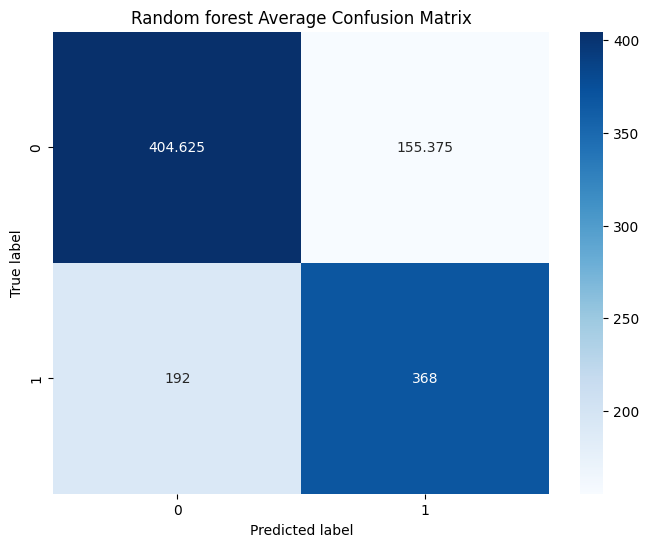

In [ ]:
# 基礎加上confusion matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 初始化用於累積混淆矩陣的變量
cumulative_cm = np.zeros((2, 2))

# 初始化表現分數列表
performance_scores_user_defined = []
drop_list=['SubjectID','VideoID', 'user-definedlabeln', 'predefinedlabel']

# 排除特定受試者的數據
excluded_subject_ids = [2,4]

# 根據排除列表過濾數據
filtered_df = extracted_df[~extracted_df['SubjectID'].isin(excluded_subject_ids)]

# 獲取所有（剩餘）受試者的ID
subject_ids = filtered_df['SubjectID'].unique()

# 迭代每個（剩餘）受試者
for test_subject_id in subject_ids:

    # 分割測試集和訓練集
    test_data = filtered_df[filtered_df['SubjectID'] == test_subject_id]
    train_data = filtered_df[filtered_df['SubjectID'] != test_subject_id]

    # 分離特徵和標籤(同時drop掉不要的)
    X_train = train_data.drop(drop_list, axis=1)
    y_train = train_data['user-definedlabeln']
    X_test = test_data.drop(drop_list, axis=1)
    y_test = test_data['user-definedlabeln']

    # 設定隨機森林參數
    params = {
        'n_estimators': 50,
        'max_depth': 10,             # 樹的最大深度
        'min_samples_split': 5,      # 最小樣本分裂（多少樣本才能分裂）
        'min_samples_leaf': 2,       # 最小樣本葉子（每個葉子節點需要有的最小樣本數）
        'random_state': 403
        }

    # 訓練隨機森林模型
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)

    # 預測和評估
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)

    print(f'user-definedlabeln使用subject: {int(test_subject_id)}測試，正確率：{score}')

    # 將得分加入列表
    performance_scores_user_defined.append(score)

    # 計算當前受試者的混淆矩陣並累積
    cm = confusion_matrix(y_test, predictions)
    cumulative_cm += cm

# 計算平均混淆矩陣
average_cm = cumulative_cm / len(subject_ids)

# 計算平均表現
average_performance_user_defined = np.mean(performance_scores_user_defined)

print("=========================")

print("Para:",params)
print("user-defined 的平均模型表現:", average_performance_user_defined)
print("=========================")

# 繪製平均混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Random forest Average Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Processing subjects: 100%|██████████| 8/8 [40:43<00:00, 305.45s/it]


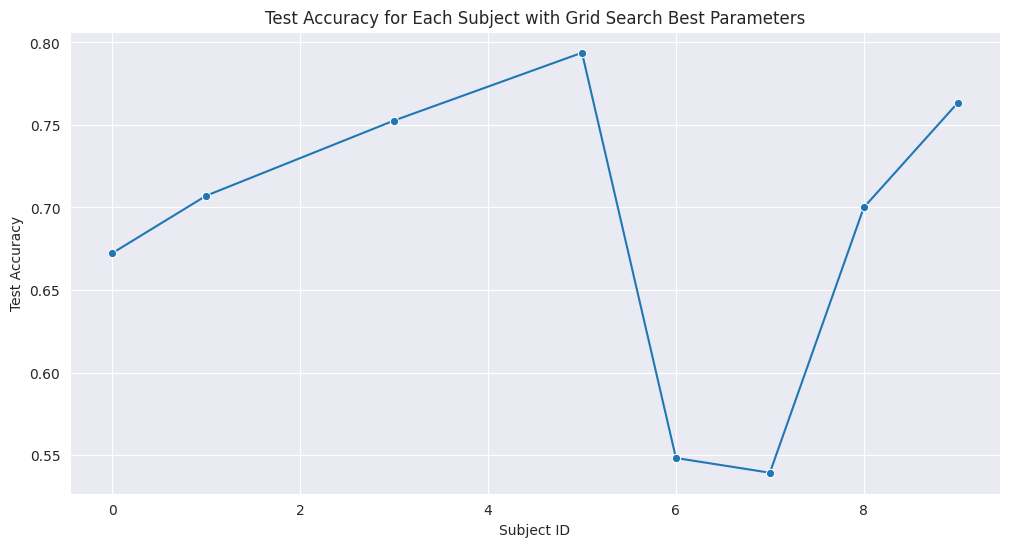

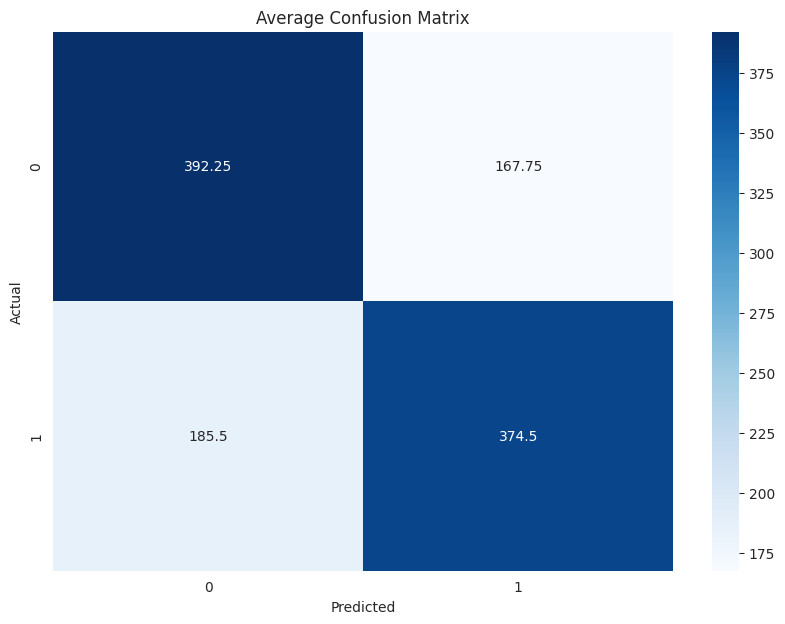

In [ ]:
# 基礎加上grid search

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 初始化用於累積混淆矩陣的變量
cumulative_cm = np.zeros((2, 2))

# 排除特定受試者的數據
excluded_subject_ids = [2, 4]

# 根據排除列表過濾數據
filtered_df = extracted_df[~extracted_df['SubjectID'].isin(excluded_subject_ids)]

# 獲取所有（剩餘）受試者的ID
subject_ids = filtered_df['SubjectID'].unique()

# 定義參數網格
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 結果存儲
results = []

# 迭代每個（剩餘）受試者
for test_subject_id in tqdm(subject_ids, desc="Processing subjects"):
    test_data = filtered_df[filtered_df['SubjectID'] == test_subject_id]
    train_data = filtered_df[filtered_df['SubjectID'] != test_subject_id]

    X_train = train_data.drop(drop_list, axis=1)
    y_train = train_data['user-definedlabeln']
    X_test = test_data.drop(drop_list, axis=1)
    y_test = test_data['user-definedlabeln']

    # Grid Search
    grid_search = GridSearchCV(RandomForestClassifier(random_state=403), param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # 預測和評估最佳模型
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    test_score = accuracy_score(y_test, predictions)

    # 紀錄結果
    results.append({
        'subject_id': test_subject_id,
        'params': best_params,
        'train_score': best_score,
        'test_score': test_score
    })

    # 計算混淆矩陣
    cm = confusion_matrix(y_test, predictions)
    cumulative_cm += cm

# 轉換結果為 DataFrame 並繪製
results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='subject_id', y='test_score', marker='o')
plt.title('Test Accuracy for Each Subject with Grid Search Best Parameters')
plt.xlabel('Subject ID')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

# 計算平均混淆矩陣
average_cm = cumulative_cm / len(subject_ids)

# 繪製平均混淆矩陣
plt.figure(figsize=(10, 7))
sns.heatmap(average_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Average Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# 修正版grid search

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import numpy as np
import pandas as pd

# 定義參數網格
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 用於存儲每種參數組合的平均準確率
all_scores = []

# 迴圈迭代每一種可能的參數組合，並使用 tqdm 顯示進度條
for params in tqdm(ParameterGrid(param_grid), desc="Iterating over parameter combinations"):
    scores = []

    # 對於每一組參數，迴圈迭代所有受試者，並使用 tqdm 顯示進度條
    for test_subject_id in tqdm(subject_ids, desc=f"Processing subjects for params {params}", leave=False):
        test_data = filtered_df[filtered_df['SubjectID'] == test_subject_id]
        train_data = filtered_df[filtered_df['SubjectID'] != test_subject_id]

        X_train = train_data.drop(drop_list, axis=1)
        y_train = train_data['user-definedlabeln']
        X_test = test_data.drop(drop_list, axis=1)
        y_test = test_data['user-definedlabeln']

        # 使用當前參數訓練模型
        model = RandomForestClassifier(**params, random_state=403)
        model.fit(X_train, y_train)

        # 計算準確率並存儲
        score = accuracy_score(y_test, model.predict(X_test))
        scores.append(score)

    # 計算當前參數組合的平均準確率
    all_scores.append({'params': params, 'average_score': np.mean(scores)})

# 將結果轉換為 DataFrame
scores_df = pd.DataFrame(all_scores)

# 輸出所有參數組合的平均準確率
print(scores_df)


Iterating over parameter combinations:   0%|          | 0/81 [00:00<?, ?it/s]
Processing subjects for params {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}:   0%|          | 0/8 [00:00<?, ?it/s]
Processing subjects for params {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}:  12%|█▎        | 1/8 [00:01<00:09,  1.31s/it]
Processing subjects for params {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}:  25%|██▌       | 2/8 [00:02<00:07,  1.23s/it]
Processing subjects for params {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}:  38%|███▊      | 3/8 [00:04<00:07,  1.45s/it]
Processing subjects for params {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}:  50%|█████     | 4/8 [00:04<00:04,  1.16s/it]
Processing subjects for params {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}:  62%

                                               params  average_score
0   {'max_depth': 8, 'min_samples_leaf': 1, 'min_s...       0.682143
1   {'max_depth': 8, 'min_samples_leaf': 1, 'min_s...       0.682031
2   {'max_depth': 8, 'min_samples_leaf': 1, 'min_s...       0.682031
3   {'max_depth': 8, 'min_samples_leaf': 1, 'min_s...       0.684040
4   {'max_depth': 8, 'min_samples_leaf': 1, 'min_s...       0.684375
..                                                ...            ...
76  {'max_depth': None, 'min_samples_leaf': 4, 'mi...       0.686272
77  {'max_depth': None, 'min_samples_leaf': 4, 'mi...       0.686384
78  {'max_depth': None, 'min_samples_leaf': 4, 'mi...       0.682589
79  {'max_depth': None, 'min_samples_leaf': 4, 'mi...       0.683147
80  {'max_depth': None, 'min_samples_leaf': 4, 'mi...       0.685268

[81 rows x 2 columns]


In [ ]:
scores_df

,params,average_score
0,"{'max_depth': 8, 'min_samples_leaf': 1, 'min_s...",0.682143
1,"{'max_depth': 8, 'min_samples_leaf': 1, 'min_s...",0.682031
2,"{'max_depth': 8, 'min_samples_leaf': 1, 'min_s...",0.682031
3,"{'max_depth': 8, 'min_samples_leaf': 1, 'min_s...",0.684040
4,"{'max_depth': 8, 'min_samples_leaf': 1, 'min_s...",0.684375
...,...,...
76,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.686272
77,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.686384
78,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.682589
79,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.683147


from matplotlib import pyplot as plt
scores_df['average_score'].plot(kind='hist', bins=20, title='average_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scores_df['average_score'].plot(kind='line', figsize=(8, 4), title='average_score')
plt.gca().spines[['top', 'right']].set_visible(False)

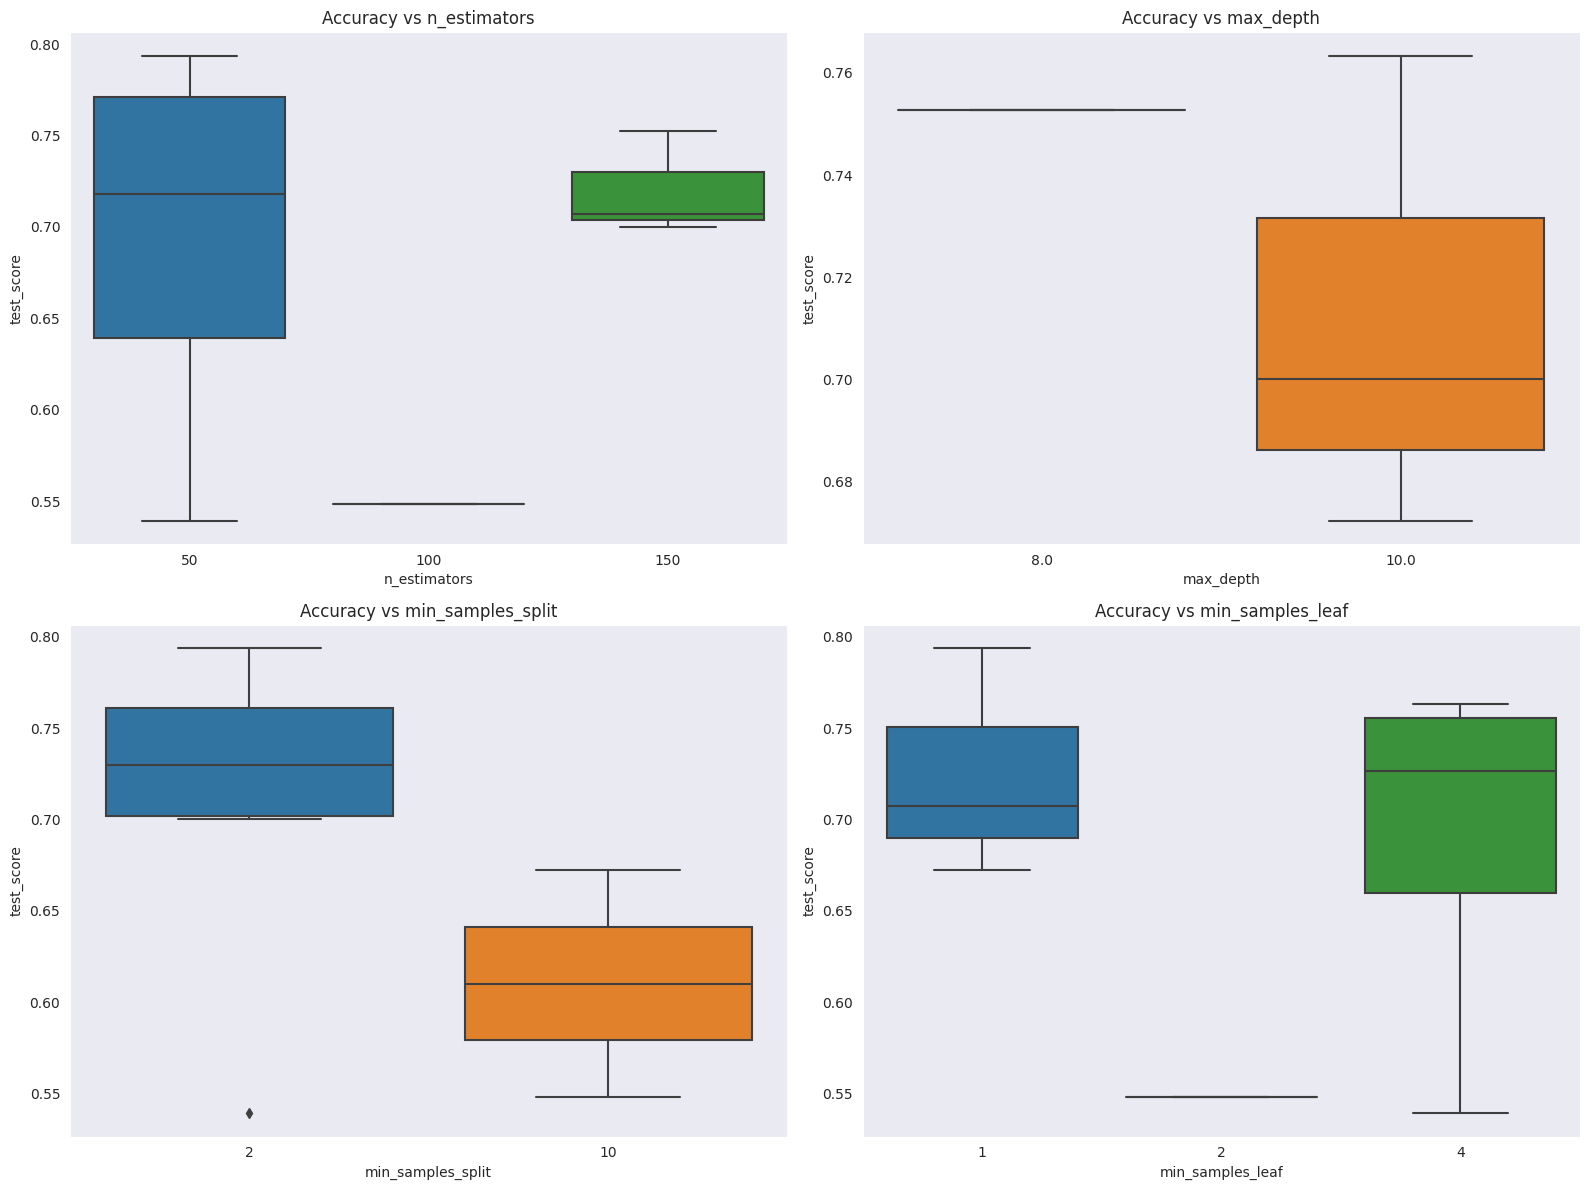

In [ ]:
# 繼續使用先前的代碼...

# 結果轉換為 DataFrame
results_df = pd.DataFrame(results)

# 擷取每個參數的資訊
results_df['n_estimators'] = results_df['params'].apply(lambda x: x['n_estimators'])
results_df['max_depth'] = results_df['params'].apply(lambda x: x['max_depth'])
results_df['min_samples_split'] = results_df['params'].apply(lambda x: x['min_samples_split'])
results_df['min_samples_leaf'] = results_df['params'].apply(lambda x: x['min_samples_leaf'])

# 繪製不同參數與準確率的關係圖
plt.figure(figsize=(16, 12))

# n_estimators 與準確率的關係
plt.subplot(2, 2, 1)
sns.boxplot(x='n_estimators', y='test_score', data=results_df)
plt.title('Accuracy vs n_estimators')

# max_depth 與準確率的關係
plt.subplot(2, 2, 2)
sns.boxplot(x='max_depth', y='test_score', data=results_df)
plt.title('Accuracy vs max_depth')

# min_samples_split 與準確率的關係
plt.subplot(2, 2, 3)
sns.boxplot(x='min_samples_split', y='test_score', data=results_df)
plt.title('Accuracy vs min_samples_split')

# min_samples_leaf 與準確率的關係
plt.subplot(2, 2, 4)
sns.boxplot(x='min_samples_leaf', y='test_score', data=results_df)
plt.title('Accuracy vs min_samples_leaf')

plt.tight_layout()
plt.show()


In [ ]:
results_df

,subject_id,params,train_score,test_score
0,0.0,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.697194,0.672321
1,1.0,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.692604,0.707143
2,3.0,"{'max_depth': 8, 'min_samples_leaf': 4, 'min_s...",0.659441,0.752679
3,5.0,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.648465,0.793750
4,6.0,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.718115,0.548214
5,7.0,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.703189,0.539286
6,8.0,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.697571,0.700000
7,9.0,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.697574,0.763393


from matplotlib import pyplot as plt
results_df['subject_id'].plot(kind='hist', bins=20, title='subject_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['train_score'].plot(kind='hist', bins=20, title='train_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['test_score'].plot(kind='hist', bins=20, title='test_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='subject_id', y='train_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='train_score', y='test_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['subject_id']
  ys = series['train_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('subject_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('subject_id')
_ = plt.ylabel('train_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['subject_id']
  ys = series['test_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('subject_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('subject_id')
_ = plt.ylabel('test_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['subject_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'subject_id'}, axis=1)
              .sort_values('subject_id', ascending=True))
  xs = counted['subject_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = results_df.sort_values('subject_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('subject_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
results_df['subject_id'].plot(kind='line', figsize=(8, 4), title='subject_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['train_score'].plot(kind='line', figsize=(8, 4), title='train_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['test_score'].plot(kind='line', figsize=(8, 4), title='test_score')
plt.gca().spines[['top', 'right']].set_visible(False)

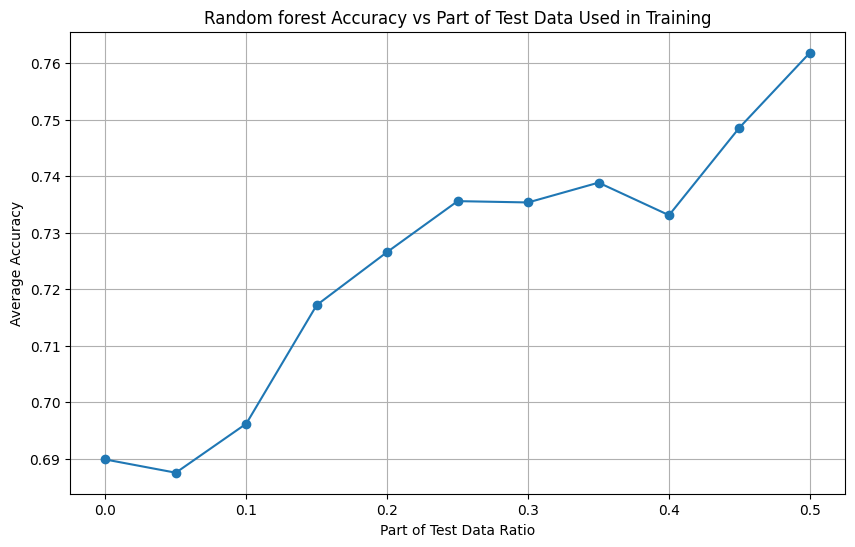

In [ ]:
# 基礎加上給予部分測試資料進訓練後對accuracy改變
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 初始化用於存儲每個比例下的平均準確率的列表
average_accuracies = []
part_of_test_ratios = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

# 排除特定受試者的數據
excluded_subject_ids = [2, 4]
filtered_df = extracted_df[~extracted_df['SubjectID'].isin(excluded_subject_ids)]
subject_ids = filtered_df['SubjectID'].unique()

# 迭代每個 part_of_test_data 比例
for ratio in part_of_test_ratios:
    performance_scores_user_defined = []  # 每個比例的性能分數
    for test_subject_id in subject_ids:
        # 分割測試集和訓練集
        test_data = filtered_df[filtered_df['SubjectID'] == test_subject_id]
        train_data = filtered_df[filtered_df['SubjectID'] != test_subject_id]

        part_of_test_data = test_data.iloc[:int(ratio * len(test_data))]
        train_data = pd.concat([train_data, part_of_test_data])
        test_data = test_data.iloc[int(ratio * len(test_data)):]

        X_train = train_data.drop(drop_list, axis=1)
        y_train = train_data['user-definedlabeln']
        X_test = test_data.drop(drop_list, axis=1)
        y_test = test_data['user-definedlabeln']

        # 設定參數並訓練模型
        params = {
            'n_estimators': 50,
            'max_depth': 10,
            'min_samples_split': 5,
            'min_samples_leaf': 2,
            'random_state': 403
        }
        model = RandomForestClassifier(**params)
        model.fit(X_train, y_train)

        # 預測和評估
        predictions = model.predict(X_test)
        score = accuracy_score(y_test, predictions)
        performance_scores_user_defined.append(score)

    # 計算當前比例的平均準確率並存儲
    average_accuracy = np.mean(performance_scores_user_defined)
    average_accuracies.append(average_accuracy)

# 繪製圖表
plt.figure(figsize=(10, 6))
plt.plot(part_of_test_ratios, average_accuracies, marker='o')
plt.title('Random forest Accuracy vs Part of Test Data Used in Training')
plt.xlabel('Part of Test Data Ratio')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()


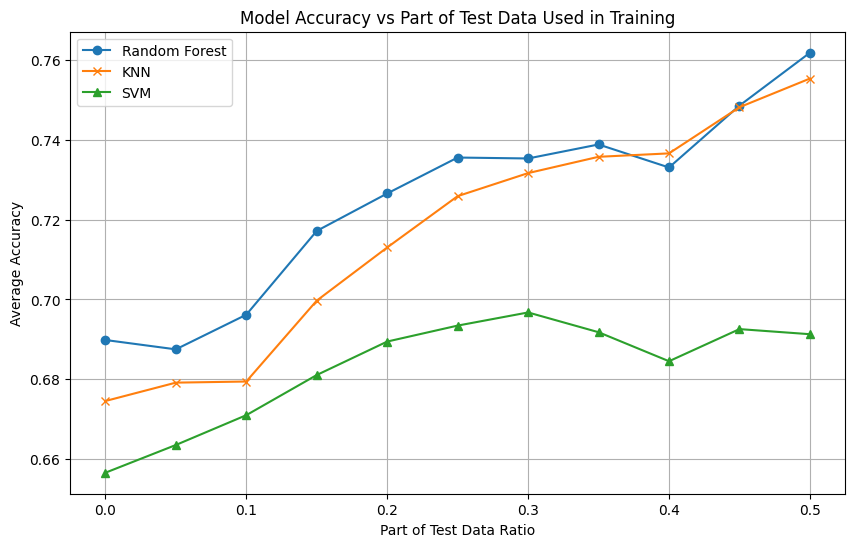

In [ ]:
### combine three model performance ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

drop_list=['SubjectID','VideoID', 'user-definedlabeln', 'predefinedlabel']

# 初始化變數
part_of_test_ratios = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
excluded_subject_ids = [2, 4]
filtered_df = extracted_df[~extracted_df['SubjectID'].isin(excluded_subject_ids)]
subject_ids = filtered_df['SubjectID'].unique()

# 定義計算準確率的函數
def calculate_accuracies(model, params=None):
    accuracies = []
    for ratio in part_of_test_ratios:
        scores = []
        for test_subject_id in subject_ids:
            test_data = filtered_df[filtered_df['SubjectID'] == test_subject_id]
            train_data = filtered_df[filtered_df['SubjectID'] != test_subject_id]

            part_of_test_data = test_data.iloc[:int(ratio * len(test_data))]
            train_data = pd.concat([train_data, part_of_test_data])
            test_data = test_data.iloc[int(ratio * len(test_data)):]

            X_train = train_data.drop(drop_list, axis=1)
            y_train = train_data['user-definedlabeln']
            X_test = test_data.drop(drop_list, axis=1)
            y_test = test_data['user-definedlabeln']

            if params:
                model.set_params(**params)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            score = accuracy_score(y_test, predictions)
            scores.append(score)
        accuracies.append(np.mean(scores))
    return accuracies

# 計算每個模型的準確率
rf_params = {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'random_state': 403}
knn_params = {'n_neighbors': 97, 'weights': 'distance', 'metric': 'manhattan'}
svm_params = {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale', 'random_state': 403}

rf_accuracies = calculate_accuracies(RandomForestClassifier(), rf_params)
knn_accuracies = calculate_accuracies(KNeighborsClassifier(), knn_params)
svm_accuracies = calculate_accuracies(SVC(), svm_params)

# 繪製合併的圖表
plt.figure(figsize=(10, 6))
plt.plot(part_of_test_ratios, rf_accuracies, marker='o', label='Random Forest')
plt.plot(part_of_test_ratios, knn_accuracies, marker='x', label='KNN')
plt.plot(part_of_test_ratios, svm_accuracies, marker='^', label='SVM')
plt.title('Model Accuracy vs Part of Test Data Used in Training')
plt.xlabel('Part of Test Data Ratio')
plt.ylabel('Average Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# K-fold 有問題
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

# 初始化表現分數列表
performance_scores_user_defined = []
drop_list = ['SubjectID', 'VideoID', 'user-definedlabeln', 'predefinedlabel']

# 排除特定受試者的數據
excluded_subject_ids = [2, 4]

# 根據排除列表過濾數據
filtered_df = extracted_df[~extracted_df['SubjectID'].isin(excluded_subject_ids)]

# 獲取所有（剩餘）受試者的ID
subject_ids = filtered_df['SubjectID'].unique()

# 迭代每個（剩餘）受試者
for test_subject_id in subject_ids:
    # 分割測試集和訓練集
    test_data = filtered_df[filtered_df['SubjectID'] == test_subject_id]
    train_data = filtered_df[filtered_df['SubjectID'] != test_subject_id]

    # 分離特徵和標籤(同時drop掉不要的)
    X_train = train_data.drop(drop_list, axis=1)
    y_train = train_data['user-definedlabeln']
    X_test = test_data.drop(drop_list, axis=1)
    y_test = test_data['user-definedlabeln']

    # 設定隨機森林參數
    params = {
        'n_estimators': 100,
        'max_depth': 10,             # 樹的最大深度
        'min_samples_split': 5,      # 最小樣本分裂（多少樣本才能分裂）
        'min_samples_leaf': 2,       # 最小樣本葉子（每個葉子節點需要有的最小樣本數）
        'random_state': 403
    }

    # 初始化 KFold
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    count = 0
    # 迭代每個 fold
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # 訓練隨機森林模型
        model = RandomForestClassifier(**params)
        model.fit(X_train_fold, y_train_fold)

        # 預測和評估
        predictions = model.predict(X_test_fold)
        score = accuracy_score(y_test_fold, predictions)

        count +=1

        print(f'使用:subject{int(test_subject_id)} in {count}-fold，正確率：{score}')

        # 將得分加入列表
        performance_scores_user_defined.append(score)

# 計算平均表現
average_performance_user_defined = np.mean(performance_scores_user_defined)

print("=========================")
print("user-defined 的平均模型表現:", average_performance_user_defined)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 22256 (\N{CJK UNIFIED IDEOGRAPH-56F0}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 24785 (\N{CJK UNIFIED IDEOGRAPH-60D1}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22256 (\N{CJK UNIFIED IDEOGRAPH-56F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib

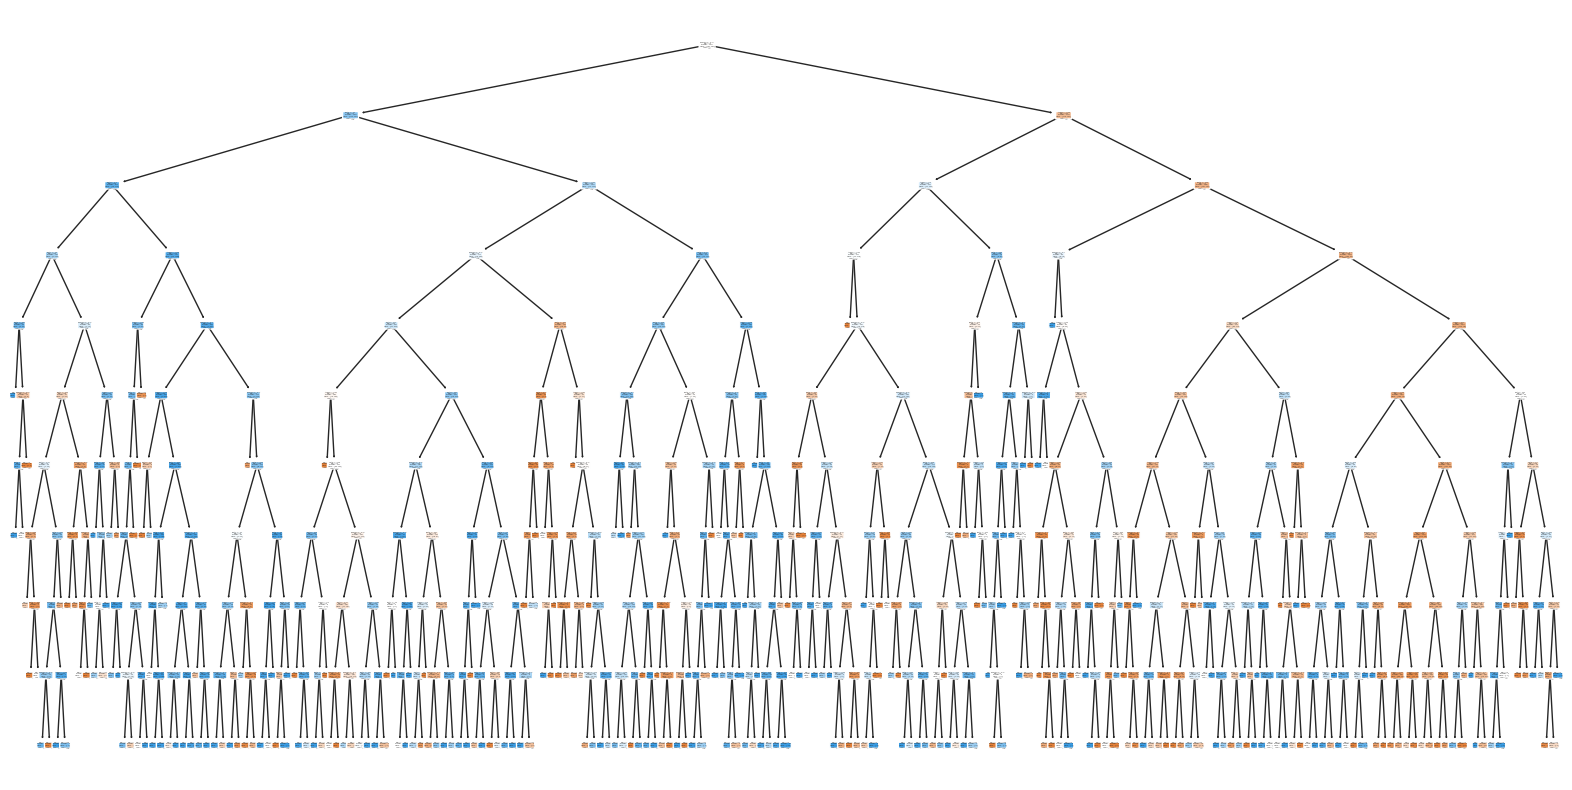

In [ ]:
# fail
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# 選擇森林中的一棵樹
chosen_tree = model.estimators_[0]

# 使用 matplotlib 進行視覺化
plt.figure(figsize=(20,10))
tree.plot_tree(chosen_tree,
               filled=True,
               feature_names=X_train.columns,
               class_names=['困惑', '不困惑'],
               rounded=True,
               proportion=False,
               precision=2)
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# 設定模型參數
n_features = len(columns_to_normalize)  # 特徵的數量
n_timepoints = 112  # 每個序列的時間點數
n_neurons = 50      # RNN層中的神經元數量
n_outputs = 1       # 輸出層的神經元數量（對於二元分類）

# 建立模型
model = Sequential()
model.add(SimpleRNN(n_neurons, input_shape=(n_timepoints, n_features)))
model.add(Dense(n_outputs, activation='sigmoid'))  # 用sigmoid作為激活函數，因為是二元分類

# 編譯模型
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 顯示模型結構
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                3000      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3051 (11.92 KB)
Trainable params: 3051 (11.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

# 假設extracted_df已經準備好，且每行是一個時間點的數據
# 將數據重塑成適合RNN輸入的形狀

X = np.array(processed_groups)[:, 0].tolist()  # 提取特徵  100*13
X = np.array(X).reshape(-1, n_timepoints, n_features)  # 重塑為 (樣本數, 時間點數, 特徵數)

y1 = np.array(processed_groups)[:, 1]  # pre-defined
y2 = np.array(processed_groups)[:, 2]  # user-defined

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

(100, 13)
